## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, on = 'Mouse ID', how = 'inner')

# Display the data table for preview
combined_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_mice = combined_data_df["Mouse ID"].nunique()
number_mice


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_data_mouseid_timepoint = combined_data_df.loc[combined_data_df.duplicated(subset =  ["Mouse ID" , "Timepoint"]), 'Mouse ID'].unique()
duplicate_data = combined_data_df.loc[combined_data_df ['Mouse ID'] == 'g989']
duplicate_data




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_data = combined_data_df.loc[combined_data_df ['Mouse ID'] == 'g989']
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data_df[combined_data_df['Mouse ID']!= 'g989']
clean_data_2 = len(clean_data)
clean_data_2

1880

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_number_mice = clean_data["Mouse ID"].nunique()
clean_number_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_regimen_groupby = clean_data.groupby('Drug Regimen')
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
average_tumor_volume = drug_regimen_groupby.mean()['Tumor Volume (mm3)']
median_tumor_volume = drug_regimen_groupby.median()['Tumor Volume (mm3)']
variance_tumor_volume = drug_regimen_groupby.var()['Tumor Volume (mm3)']
sd_tumor_volume = drug_regimen_groupby.std()['Tumor Volume (mm3)']
sem_tumor_volume = drug_regimen_groupby.sem()['Tumor Volume (mm3)']
# Assemble the resulting series into a single summary dataframe.
drug_regimen_df = pd.DataFrame({"Mean Tumor Volume" : average_tumor_volume,
                               "Median Tumor Volume" : median_tumor_volume,
                               "Variance Tumor Volume" : variance_tumor_volume, 
                               "SD Tumor Volume" : sd_tumor_volume,
                               "SEM Tumor Volume": sem_tumor_volume})
drug_regimen_df


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,SD Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen_groupby_summary = drug_regimen_groupby.agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']}) 
drug_regimen_groupby_summary
# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:>

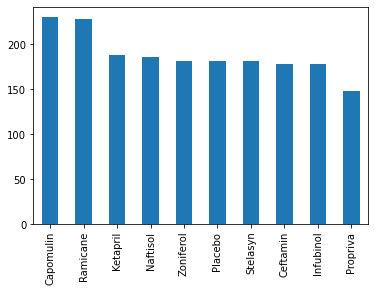

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_regimen_counts = clean_data['Drug Regimen'].value_counts()
drug_regimen_counts.plot(kind = "bar")


<BarContainer object of 10 artists>

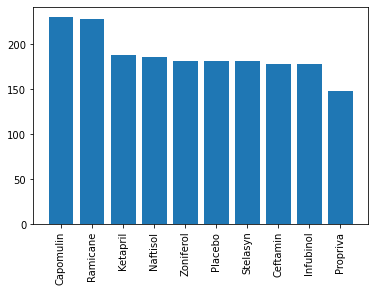

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_regimen_counts = clean_data['Drug Regimen'].value_counts()
x_axis = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Ceftamin", "Infubinol", "Propriva"]
y_axis = [230, 228, 188, 186, 182, 181, 181, 178, 178, 148]
tick_locations = [value for value in x_axis]
plt.xticks(rotation = 90)
plt.bar(x_axis, y_axis)



<AxesSubplot:ylabel='Sex'>

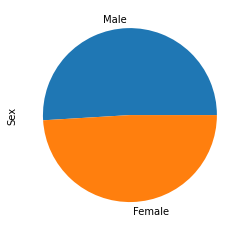

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_mice = clean_data.loc[:, ["Mouse ID" , "Sex"]]
sex_mice_count = sex_mice['Sex'].value_counts()
sex_mice_count.plot(kind = "pie")



([<matplotlib.patches.Wedge at 0x1aa671974f0>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

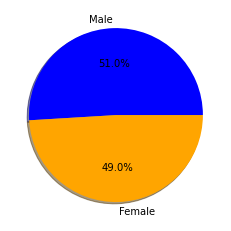

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = [958, 922]
colors = ["blue", "orange"]
explode = (0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=0)


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

mouseid_groupby = clean_data.groupby(['Mouse ID'])['Timepoint'].max()
mouseid_groupby = mouseid_groupby.reset_index()
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_combined_df = pd.merge(mouseid_groupby, clean_data, on = ('Mouse ID', 'Timepoint'), how = 'inner')
mouse_combined_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
results_dict = {"Capomulin" : None, "Ramicane" : None, "Infubinol" : None, "Ceftamin" : None}

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in results_dict:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = mouse_combined_df.loc[mouse_combined_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    quartiles = tumor_volumes.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    mean = quartiles [0.5]
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    results_dict[drug] = tumor_volumes
    
    print(f"Lower quartile of Tumor Volume for {drug} is: {lowerq}")
    print(f"Upper quartile of Tumor Volume for {drug} is: {upperq}")
    print(f"The interquartile range of Tumor Volume for {drug} is: {iqr}")
    print(f"The median of Tumor Volume for {drug} is: {mean}")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    
    
    
    
    
    
    # Determine outliers using upper and lower bounds
    

Lower quartile of Tumor Volume for Capomulin is: 32.37735684
Upper quartile of Tumor Volume for Capomulin is: 40.1592203
The interquartile range of Tumor Volume for Capomulin is: 7.781863460000004
The median of Tumor Volume for Capomulin is: 38.125164399999996
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Lower quartile of Tumor Volume for Ramicane is: 31.56046955
Upper quartile of Tumor Volume for Ramicane is: 40.65900627
The interquartile range of Tumor Volume for Ramicane is: 9.098536719999998
The median of Tumor Volume for Ramicane is: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Lower quartile of Tumor Volume for Infubinol is: 54.04860769
Upper quartile of Tumor Volume for Infubinol is: 65.52574285
The interquartile range of Tumor Volume for Infubinol is: 11.477135160000003
The median of Tumor Volume for Infubinol is: 60.16518046
Values below 36.83290494999999 could be out

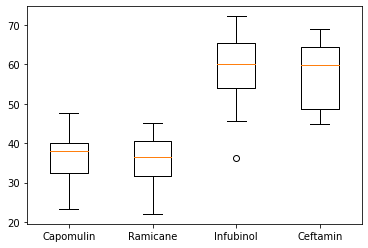

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_tumor_volume_list = [v for k, v in results_dict.items()]
ax1 = plt.figure().subplots()

ax1.boxplot(final_tumor_volume_list, labels = results_dict.keys())

plt.show()

## Line and Scatter Plots

   Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10     s185    Capomulin  Female           3          17          0   
11     s185    Capomulin  Female           3          17          5   
12     s185    Capomulin  Female           3          17         10   
13     s185    Capomulin  Female           3          17         15   
14     s185    Capomulin  Female           3          17         20   
15     s185    Capomulin  Female           3          17         25   
16     s185    Capomulin  Female           3          17         30   
17     s185    Capomulin  Female           3          17         35   
18     s185    Capomulin  Female           3          17         40   
19     s185    Capomulin  Female           3          17         45   

    Tumor Volume (mm3)  Metastatic Sites  
10           45.000000                 0  
11           43.878496                 0  
12           37.614948                 0  
13           38.177232                 0  
14 

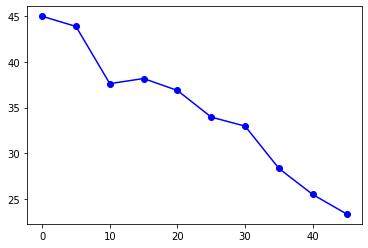

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_set_data = clean_data.loc[clean_data['Drug Regimen'] =='Capomulin']
capomulin_mouse_ids = capomulin_set_data["Mouse ID"].unique()

chosen_mouse = random.choice(capomulin_mouse_ids)
mouse = capomulin_set_data.loc[capomulin_set_data['Mouse ID'] == chosen_mouse].sort_values("Timepoint")
print(mouse)

x_data = mouse['Timepoint']
y_data = mouse['Tumor Volume (mm3)']

mouse_line_plot = plt.plot(x_data, y_data, marker ='o', color='blue')

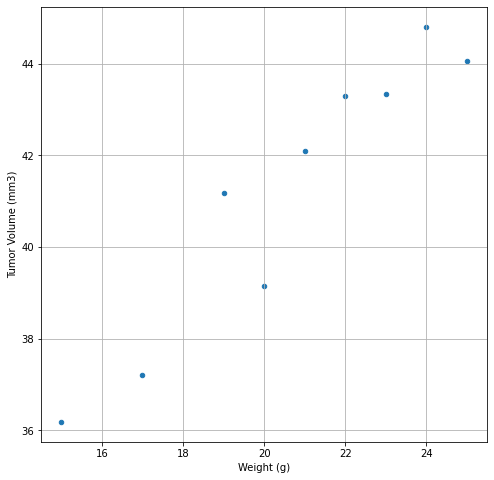

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data = clean_data[clean_data["Drug Regimen"].isin(["Capomulin"])]

capomulin_scatter_df = clean_data[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]


capomulin_scatter_plot = capomulin_data.reset_index()

capomulin_grouped_weight = capomulin_scatter_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()


capomulin_scatterplot = capo_grouped_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (8,8))







## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
